In [1]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + str(local))
    return filename

download('https://github.com/AllenDowney/ThinkPython/raw/v3/thinkpython.py');
download('https://github.com/AllenDowney/ThinkPython/raw/v3/diagram.py');

import thinkpython

# Dictionaries

This chapter presents a built-in type called a dictionary.
It is one of Python's best features -- and the building block of many efficient and elegant algorithms.

We'll use dictionaries to compute the number of unique words in a book and the number of times each one appears.
And in the exercises, we'll use dictionaries to solve word puzzles.

## A dictionary is a mapping

A **dictionary** is like a list, but more general.
In a list, the indices have to be integers; in a dictionary they can be (almost) any type.
For example, suppose we make a list of number words, like this.

In [2]:
lst = ['zero', 'one', 'two']

We can use an integer as an index to get the corresponding word.

In [3]:
lst[1]

'one'

But suppose we want to go in the other direction, and look up a word to get the corresponding integer.
We can't do that with a list, but we can with a dictionary.
We'll start by creating an empty dictionary and assigning it to `numbers`.

In [4]:
numbers = {}
numbers

{}

The curly braces, `{}`, represent an empty dictionary.
To add items to the dictionary, we'll use square brackets.

In [5]:
numbers['zero'] = 0

This assignment adds to the dictionary an **item**, which represents the association of a **key** and a **value**.
In this example, the key is the string `'zero'` and the value is the integer `0`.
If we display the dictionary, we see that it contains one item, which contains a key and a value separated by a colon, `:`.

In [6]:
numbers

{'zero': 0}

We can add more items like this.

In [7]:
numbers['one'] = 1
numbers['two'] = 2
numbers

{'zero': 0, 'one': 1, 'two': 2}

Now the dictionary contains three items.

To look up a key and get the corresponding value, we use the bracket operator.

In [8]:
numbers['two']

2

If the key isn't in the dictionary, we get a `KeyError`.

In [9]:
%%expect KeyError
numbers['three']


KeyError: 'three'

The `len` function works on dictionaries; it returns the number of items.

In [10]:
len(numbers)

3

In mathematical language, a dictionary represents a **mapping** from keys to values, so you can also say that each key "maps to" a value.
In this example, each number word maps to the corresponding integer.

The following figure shows the state diagram for `numbers`.

In [11]:
from diagram import make_dict, Binding, Value

d1 = make_dict(numbers, dy=-0.3, offsetx=0.37)
binding1 = Binding(Value('numbers'), d1)

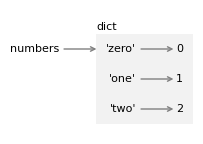

In [12]:
from diagram import diagram, adjust, Bbox

width, height, x, y = [1.83, 1.24, 0.49, 0.85]
ax = diagram(width, height)
bbox = binding1.draw(ax, x, y)
# adjust(x, y, bbox)
#import matplotlib.pyplot as plt
#plt.savefig('state_diagram_dict.png')

A dictionary is represented by a box with the word "dict" outside and the items inside.
Each item is represented by a key and an arrow pointing to a value.
The quotation marks indicate that the keys here are strings, not variable names.

## Creating dictionaries

In the previous section we created an empty dictionary and added items one at a time using the bracket operator.
Instead, we could have created the dictionary all at once like this.

In [13]:
numbers = {'zero': 0, 'one': 1, 'two': 2}

Each item consists of a key and a value separated by a colon.
The items are separated by commas and enclosed in curly braces.

Another way to create a dictionary is to use the `dict` function.
We can make an empty dictionary like this.

In [14]:
empty = dict()
empty

{}

And we can make a copy of a dictionary like this.

In [15]:
numbers_copy = dict(numbers)
numbers_copy

{'zero': 0, 'one': 1, 'two': 2}

It is often useful to make a copy before performing operations that modify dictionaries.

(section_dictionary_in_operator)=
## The in operator

The `in` operator works on dictionaries, too; it tells you whether something appears as a *key* in the dictionary.

In [16]:
'one' in numbers

True

The `in` operator does *not* check whether something appears as a value.

In [17]:
1 in numbers

False

To see whether something appears as a value in a dictionary, you can use the method `values`, which returns a sequence of values, and then use the `in` operator.

In [18]:
1 in numbers.values()

True

The items in a Python dictionary are stored in a **hash table**, which is a way of organizing data that has a remarkable property: the `in` operator takes about the same amount of time no matter how many items are in the dictionary.
That makes it possible to write some remarkably efficient algorithms.

In [19]:
download('https://raw.githubusercontent.com/AllenDowney/ThinkPython/v3/words.txt');

To demonstrate, we'll compare two algorithms for finding pairs of words where one is the reverse of another -- like `stressed` and `desserts`.
We'll start by reading the word list.

In [20]:
word_list = open('words.txt').read().split()
len(word_list)

113783

And here's `reverse_word` from the previous chapter.

In [21]:
def reverse_word(word):
    return ''.join(reversed(word))

The following function loops through the words in the list.
For each one, it reverses the letters and then checks whether the reversed word in the word list.

In [22]:
def too_slow():
    count = 0
    for word in word_list:
        if reverse_word(word) in word_list:
            count += 1
    return count

This function takes more than a minute to run.
The problem is that the `in` operator checks the words in the list one at a time, starting at the beginning.
If it doesn't find what it's looking for -- which happens most of the time -- it has to search all the way to the end.

In [23]:
# %time too_slow()

And the `in` operator is inside the loop, so it runs once for each word.
Since there are more than 100,000 words in the list, and for each one we check more than 100,000 words, the total number of comparisons is the number of words squared -- roughly -- which is almost 13 billion. 

In [24]:
len(word_list)**2

12946571089

We can make this function much faster with a dictionary.
The following loop creates a dictionary that contains the words as keys.

In [25]:
word_dict = {}
for word in word_list:
    word_dict[word] = 1

The values in `word_dict` are all `1`, but they could be anything, because we won't ever look them up -- we will only use this dictionary to check whether a key exists.

Now here's a version of the previous function that replaces `word_list` with `word_dict`.

In [26]:
def much_faster():
    count = 0
    for word in word_dict:
        if reverse_word(word) in word_dict:
            count += 1
    return count

This function takes less than one hundredth of a second, so it's about 10,000 times faster than the previous version.

In [27]:
%time much_faster()

CPU times: user 31.5 ms, sys: 191 µs, total: 31.7 ms
Wall time: 31.7 ms


885

In general, the time it takes to find an element in a list is proportional to the length of the list.
The time it takes to find a key in a dictionary is almost constant -- regardless of the number of items.

In [28]:
d = {'a': 1, 'b': 2}
d['a'] = 3
d

{'a': 3, 'b': 2}

## A collection of counters

Suppose you are given a string and you want to count how many times each letter appears.
A dictionary is a good tool for this job.
We'll start with an empty dictionary.

In [29]:
counter = {}

As we loop through the letters in the string, suppose we see the letter `a` for the first time.
We can add it to the dictionary like this.

In [30]:
counter['a'] = 1

The value `1` indicates that we have seen the letter once.
Later, if we see the same letter again, we can increment the counter like this.

In [31]:
counter['a'] += 1

Now the value associated with `a` is `2`, because we've seen the letter twice.

In [32]:
counter

{'a': 2}

The following function uses these features to count the number of times each letter appears in a string.

In [33]:
def value_counts(string):
    counter = {}
    for letter in string:
        if letter not in counter:
            counter[letter] = 1
        else:
            counter[letter] += 1
    return counter

Each time through the loop, if `letter` is not in the dictionary, we create a new item with key `letter` and value `1`.
If `letter` is already in the dictionary we increment the value associated with `letter`.

Here's an example.

In [34]:
counter = value_counts('brontosaurus')
counter

{'b': 1, 'r': 2, 'o': 2, 'n': 1, 't': 1, 's': 2, 'a': 1, 'u': 2}

The items in `counter` show that the letter `b` appears once, `r` appears twice, and so on.

## Looping and dictionaries

If you use a dictionary in a `for` statement, it traverses the keys of the dictionary.
To demonstrate, let's make a dictionary that counts the letters in `banana`.

In [35]:
counter = value_counts('banana')
counter

{'b': 1, 'a': 3, 'n': 2}

The following loop prints the keys, which are the letters.

In [36]:
for key in counter:
    print(key)

b
a
n


To print the values, we can use the `values` method.

In [37]:
for value in counter.values():
    print(value)

1
3
2


To print the keys and values, we can loop through the keys and look up the corresponding values.

In [38]:
for key in counter:
    value = counter[key]
    print(key, value)

b 1
a 3
n 2


In the next chapter, we'll see a more concise way to do the same thing.

## Lists and dictionaries

You can put a list in a dictionary as a value.
For example, here's a dictionary that maps from the number `4` to a list of four letters.

In [39]:
d = {4: ['r', 'o', 'u', 's']}
d

{4: ['r', 'o', 'u', 's']}

But you can't put a list in a dictionary as a key.
Here's what happens if we try.

In [40]:
%%expect TypeError
letters = list('abcd')
d[letters] = 4

TypeError: unhashable type: 'list'

I mentioned earlier that dictionaries use hash tables, and that means that the keys have to be **hashable**.

A **hash** is a function that takes a value (of any kind) and returns an integer.
Dictionaries use these integers, called hash values, to store and look up keys.

This system only works if a key is immutable, so its hash value is always the same.
But if a key is mutable, its hash value could change, and the dictionary would not work.
That's why keys have to be hashable, and why mutable types like lists aren't.

Since dictionaries are mutable, they can't be used as keys, either.
But they *can* be used as values.

(section_palindrome_list)=
## Accumulating a list

For many programming tasks, it is useful to loop through one list or dictionary while building another.
As an example, we'll loop through the words in `word_dict` and make a list of palindromes -- that is, words that are spelled the same backward and forward, like "noon" and "rotator".

In the previous chapter, one of the exercises asked you to write a function that checks whether a word is a palindrome.
Here's a solution that uses `reverse_word`.

In [41]:
def is_palindrome(word):
    """Check if a word is a palindrome."""
    return reverse_word(word) == word

If we loop through the words in `word_dict`, we can count the number of palindromes like this.

In [42]:
count = 0

for word in word_dict:
    if is_palindrome(word):
        count +=1
        
count

91

By now, this pattern is familiar.

* Before the loop, `count` is initialized to `0`.

* Inside the loop, if `word` is a palindrome, we increment `count`.

* When the loop ends, `count` contains the total number of palindromes.

We can use a similar pattern to make a list of palindromes.

In [43]:
palindromes = []

for word in word_dict:
    if is_palindrome(word):
        palindromes.append(word)

palindromes[:10]

['aa', 'aba', 'aga', 'aha', 'ala', 'alula', 'ama', 'ana', 'anna', 'ava']

Here's how it works:

* Before the loop, `palindromes` is initialized with an empty list.

* Inside the loop, if `word` is a palindrome, we append it to the end of `palindromes`.

* When the loop ends, `palindromes` is a list of palindromes.

In this loop, `palindromes` is used as an **accumulator**, which is a variable that collects or accumulates data during a computation.

Now suppose we want to select only palindromes with seven or more letters.
We can loop through `palindromes` and make a new list that contains only long palindromes.

In [44]:
long_palindromes = []

for word in palindromes:
    if len(word) >= 7:
        long_palindromes.append(word)
        
long_palindromes

['deified', 'halalah', 'reifier', 'repaper', 'reviver', 'rotator', 'sememes']

Looping through a list like this, selecting some elements and omitting others, is called **filtering**.

(section_memos)=
## Memos

If you ran the `fibonacci` function from [Chapter 6](section_fibonacci), maybe you noticed that the bigger the argument you provide, the longer the function takes to run.

In [45]:
def fibonacci(n):
    if n == 0:
        return 0
    
    if n == 1:
        return 1

    return fibonacci(n-1) + fibonacci(n-2)

Furthermore, the run time increases quickly.
To understand why, consider the following figure, which shows the **call graph** for
`fibonacci` with `n=3`:

In [46]:
from diagram import make_binding, Frame, Arrow

bindings = [make_binding('n', i) for i in range(5)]
frames = [Frame([binding]) for binding in bindings]

In [47]:
arrowprops = dict(arrowstyle="-", color='gray', alpha=0.5, ls='-', lw=0.5)

def left_arrow(ax, bbox1, bbox2):
    x = bbox1.xmin + 0.1
    y = bbox1.ymin
    dx = bbox2.xmax - x - 0.1
    dy = bbox2.ymax - y
    arrow = Arrow(dx=dx, dy=dy, arrowprops=arrowprops)
    return arrow.draw(ax, x, y)

def right_arrow(ax, bbox1, bbox2):
    x = bbox1.xmax - 0.1
    y = bbox1.ymin
    dx = bbox2.xmin - x + 0.1
    dy = bbox2.ymax - y
    arrow = Arrow(dx=dx, dy=dy, arrowprops=arrowprops)
    return arrow.draw(ax, x, y)

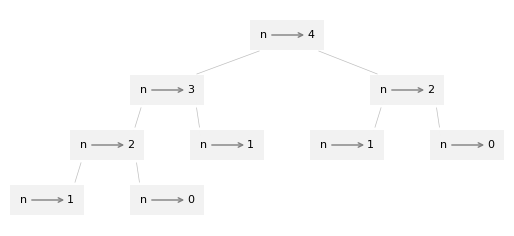

In [48]:
from diagram import diagram, adjust, Bbox

width, height, x, y = [4.94, 2.16, -1.03, 1.91]
ax = diagram(width, height)

dx = 0.6
dy = 0.55

bboxes = []
bboxes.append(frames[4].draw(ax, x+6*dx, y))

bboxes.append(frames[3].draw(ax, x+4*dx, y-dy))
bboxes.append(frames[2].draw(ax, x+8*dx, y-dy))

bboxes.append(frames[2].draw(ax, x+3*dx, y-2*dy))
bboxes.append(frames[1].draw(ax, x+5*dx, y-2*dy))
bboxes.append(frames[1].draw(ax, x+7*dx, y-2*dy))
bboxes.append(frames[0].draw(ax, x+9*dx, y-2*dy))

bboxes.append(frames[1].draw(ax, x+2*dx, y-3*dy))
bboxes.append(frames[0].draw(ax, x+4*dx, y-3*dy))

left_arrow(ax, bboxes[0], bboxes[1])
left_arrow(ax, bboxes[1], bboxes[3])
left_arrow(ax, bboxes[3], bboxes[7])
left_arrow(ax, bboxes[2], bboxes[5])

right_arrow(ax, bboxes[0], bboxes[2])
right_arrow(ax, bboxes[1], bboxes[4])
right_arrow(ax, bboxes[2], bboxes[6])
right_arrow(ax, bboxes[3], bboxes[8])

bbox = Bbox.union(bboxes)
# adjust(x, y, bbox)

A call graph shows a set of function frames, with lines connecting each frame to the frames of the functions it calls.
At the top of the graph, `fibonacci` with `n=4` calls `fibonacci` with ` n=3` and `n=2`.
In turn, `fibonacci` with `n=3` calls `fibonacci` with `n=2` and `n=1`. And so on.

Count how many times `fibonacci(0)` and `fibonacci(1)` are called. 
This is an inefficient solution to the problem, and it gets worse as the argument gets bigger.

One solution is to keep track of values that have already been computed by storing them in a dictionary.
A previously computed value that is stored for later use is called a **memo**.
Here is a "memoized" version of `fibonacci`:

In [49]:
known = {0:0, 1:1}

def fibonacci_memo(n):
    if n in known:
        return known[n]

    res = fibonacci_memo(n-1) + fibonacci_memo(n-2)
    known[n] = res
    return res

`known` is a dictionary that keeps track of the Fibonacci numbers we already know
It starts with two items: `0` maps to `0` and `1` maps to `1`.

Whenever `fibonacci_memo` is called, it checks `known`.
If the result is already there, it can return immediately.
Otherwise it has to compute the new value, add it to the dictionary, and return it.

Comparing the two functions, `fibonacci(40)` takes about 30 seconds to run.
`fibonacci_memo(40)` takes about 30 microseconds, so it's a million times faster.
In the notebook for this chapter, you'll see where these measurements come from.

To measure how long a function takes, we can use `%time` which is one of Jupyter's "built-in magic commands".
These commands are not part of the Python language, so they might not work in other development environments.

In [50]:
# %time fibonacci(40)

In [51]:
%time fibonacci_memo(40)

CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 11 µs


102334155

## Debugging

As you work with bigger datasets it can become unwieldy to debug by printing and checking the output by hand. Here are some suggestions for debugging large datasets:

1) Scale down the input: If possible, reduce the size of the dataset. For example if the
    program reads a text file, start with just the first 10 lines, or
    with the smallest example you can find. You can either edit the
    files themselves, or (better) modify the program so it reads only
    the first `n` lines.

    If there is an error, you can reduce `n` to the smallest value where the error occurs.
    As you find and correct errors, you can increase `n` gradually.

2. Check summaries and types: Instead of printing and checking the entire dataset, consider
    printing summaries of the data -- for example, the number of items in
    a dictionary or the total of a list of numbers.

    A common cause of runtime errors is a value that is not the right type. For debugging this kind of error, it is often enough to print the type of a value.

3. Write self-checks: Sometimes you can write code to check for errors automatically. For
    example, if you are computing the average of a list of numbers, you
    could check that the result is not greater than the largest element
    in the list or less than the smallest. This is called a "sanity
    check" because it detects results that are "insane".

    Another kind of check compares the results of two different computations to see if they are consistent. This is called a "consistency check".

4. Format the output: Formatting debugging output can make it easier to spot an error. We saw an example in [Chapter 6](section_debugging_factorial). Another tool you might find useful is the `pprint` module, which provides a `pprint` function that displays built-in types in a more human-readable format (`pprint` stands for "pretty print").

    Again, time you spend building scaffolding can reduce the time you spend debugging.

## Glossary

**dictionary:**
 An object that contains key-value pairs, also called items.

**item:**
 In a dictionary, another name for a key-value pair.

**key:**
 An object that appears in a dictionary as the first part of a key-value pair.

**value:**
 An object that appears in a dictionary as the second part of a key-value pair. This is more specific than our previous use of the word "value".

**mapping:**
  A relationship in which each element of one set corresponds to an element of another set.

**hash table:**
A collection of key-value pairs organized so that we can look up a key and find its value efficiently.

**hashable:**
 Immutable types like integers, floats and strings are hashable.
 Mutable types like lists and dictionaries are not.

**hash function:**
A function that takes an object and computes an integer that is used to locate a key in a hash table.

**accumulator:**
 A variable used in a loop to add up or accumulate a result.

**filtering:**
Looping through a sequence and selecting or omitting elements.

**call graph:**
A diagram that shows every frame created during the execution of a program, with an arrow from each caller to each callee.

**memo:**
 A computed value stored to avoid unnecessary future computation.

## Exercises

In [52]:
# This cell tells Jupyter to provide detailed debugging information
# when a runtime error occurs. Run it before working on the exercises.

%xmode Verbose

Exception reporting mode: Verbose


### Ask an assistant

In this chapter, I said the keys in a dictionary have to be hashable and I gave a short explanation. If you would like more details, ask a virtual assistant, "Why do keys in Python dictionaries have to be hashable?"

In [a previous section](section_dictionary_in_operator), we stored a list of words as keys in a dictionary so that we could use an efficient version of the `in` operator.
We could have done the same thing using a `set`, which is another built-in data type.
Ask a virtual assistant, "How do I make a Python set from a list of strings and check whether a string is an element of the set?"

### Exercise

Dictionaries have a method called `get` that takes a key and a default value. 
If the key appears in the dictionary, `get` returns the corresponding value; otherwise it returns the default value.
For example, here's a dictionary that maps from the letters in a string to the number of times they appear.

In [53]:
counter = value_counts('brontosaurus')

If we look up a letter that appears in the word, `get` returns the number of times it appears.

In [54]:
counter.get('b', 0)

1

If we look up a letter that doesn't appear, we get the default value, `0`.

In [55]:
counter.get('c', 0)

0

Use `get` to write a more concise version of `value_counts`.
You should be able to eliminate the `if` statement.

### Exercise

What is the longest word you can think of where each letter appears only once?
Let's see if we can find one longer than `unpredictably`.

Write a function named `has_duplicates` that takes a sequence -- like a list or string -- as a parameter and returns `True` if there is any element that appears in the sequence more than once.

To get you started, here's an outline of the function with doctests.

In [56]:
def has_duplicates(t):
    """Check whether any element in a sequence appears more than once.
    
    >>> has_duplicates('banana')
    True
    >>> has_duplicates('ambidextrously')
    False
    >>> has_duplicates([1, 2, 2])
    True
    >>> has_duplicates([1, 2, 3])
    False
    """
    return None

In [57]:
# Solution goes here

You can use `doctest` to test your function.

In [58]:
from doctest import run_docstring_examples

def run_doctests(func):
    run_docstring_examples(func, globals(), name=func.__name__)

run_doctests(has_duplicates)

**********************************************************************
File "__main__", line 4, in has_duplicates
Failed example:
    has_duplicates('banana')
Expected:
    True
Got nothing
**********************************************************************
File "__main__", line 6, in has_duplicates
Failed example:
    has_duplicates('ambidextrously')
Expected:
    False
Got nothing
**********************************************************************
File "__main__", line 8, in has_duplicates
Failed example:
    has_duplicates([1, 2, 2])
Expected:
    True
Got nothing
**********************************************************************
File "__main__", line 10, in has_duplicates
Failed example:
    has_duplicates([1, 2, 3])
Expected:
    False
Got nothing


You can use this loop to find the longest words with no repeated letters.

In [59]:
no_repeats = []

for word in word_list:
    if len(word) > 12 and not has_duplicates(word):
        no_repeats.append(word)
        
no_repeats

['abbreviations',
 'abnormalities',
 'abrasivenesses',
 'absentmindedly',
 'absentmindedness',
 'absentmindednesses',
 'abstractnesses',
 'abstrusenesses',
 'abusivenesses',
 'accelerations',
 'accentuations',
 'acceptabilities',
 'acceptability',
 'accessibilities',
 'accessibility',
 'acclimatization',
 'acclimatizations',
 'accommodating',
 'accommodation',
 'accommodations',
 'accompaniment',
 'accompaniments',
 'accomplishers',
 'accomplishing',
 'accomplishment',
 'accomplishments',
 'accountabilities',
 'accountability',
 'accountancies',
 'accoutrements',
 'accumulations',
 'accuratenesses',
 'acknowledgement',
 'acknowledgements',
 'acknowledging',
 'acknowledgment',
 'acknowledgments',
 'acquaintances',
 'acquaintanceship',
 'acquaintanceships',
 'acquiescences',
 'acquiescently',
 'actualization',
 'actualizations',
 'acupuncturist',
 'acupuncturists',
 'adaptabilities',
 'adjudications',
 'administrable',
 'administrants',
 'administration',
 'administrations',
 'administra

### Exercise

Write function called `find_repeats` that takes a dictionary that maps from each key to a counter, like the result from `value_counts`.
It should loop through the dictionary and return a list of keys that have counts greater than `1`.
You can use the following outline to get started.

In [60]:
def find_repeats(counter):
    """Makes a list of keys with values greater than 1.
    
    counter: dictionary that maps from keys to counts
    
    returns: list of keys
    """
    return []

In [61]:
# Solution goes here

You can use the following examples to test your code.
First, we'll make a dictionary that maps from letters to counts.

In [62]:
counter1 = value_counts('banana')
counter1

{'b': 1, 'a': 3, 'n': 2}

The result from `find_repeats` should be `['a', 'n']`.

In [63]:
repeats = find_repeats(counter1)
repeats

[]

Here's another example that starts with a list of numbers.
The result should be `[1, 2]`.

In [64]:
counter1 = value_counts([1, 2, 3, 2, 1])
repeats = find_repeats(counter1)
repeats

[]

### Exercise

Suppose you run `value_counts` with two different words and save the results in two dictionaries.

In [65]:
counter1 = value_counts('brontosaurus')
counter2 = value_counts('apatosaurus')

Each dictionary maps from a set of letters to the number of times they appear.
Write a function called `add_counters` that takes two dictionaries like this and returns a new dictionary that contains all of the letters and the total number of times they appear in either word.

There are many ways to solve this problem.
Once you have a working solution, consider asking a virtual assistant for different solutions.

In [66]:
# Solution goes here

In [67]:
# Solution goes here

### Exercise

A word is "interlocking" if we can split it into two words by taking alternating letters.
For example, "schooled" is an interlocking word because it can be split into "shoe" and "cold".

To select alternating letters from a string, you can use a slice operator with three components that indicate where to start, where to stop, and the "step size" between the letters.

In the following slice, the first component is `0`, so we start with the first letter.
The second component is `None`, which means we should go all the way to the end of the string.
And the third component is `2`, so there are two steps between the letters we select.

In [68]:
word = 'schooled'
first = word[0:None:2]
first

'shoe'

Instead of providing `None` as the second component, we can get the same effect by leaving it out altogether.
For example, the following slice selects alternating letters, starting with the second letter.

In [69]:
second = word[1::2]
second

'cold'

Write a function called `is_interlocking` that takes a word as an argument and returns `True` if it can be split into two interlocking words.

In [70]:
# Solution goes here

You can use the following loop to find the interlocking words in the word list.

In [71]:
# Solution goes here